# Clustering the Accessories Dataset

## Executive Summary:
Tous Jewelry store is an inexpensive brand that sells a variety of items including rings, earrings, pendants. Items can be made of different materials including gold, silver, and titanium, as well as a variety of gymstones and crystals. In this case study, we would like to cluster the accessories dataset and find out the underlying pattern of the data. The data wa obtained via web scraping the official Tous website, and is available on Kaggle on the following link https://www.kaggle.com/arimaha/what-makes-a-best-seller-item. We used Hierarchical Clustering and obtained a Silhouette score of approximately 0.74.

#### Research Question: 
We would like to know whether clustering the dataset would cluster them based on the item type. Therefore, we removed the columns corresponding to the item type before applying the clustering model, then we checked our clusters against the initial item types. 

#### Findings:
The resulting clusters did not match the item types. Rather, the clusters demonstrated the different price ranges of the items. Moreover, one of the clusters detected outliers among the price feature. 

#### Future Work:
Further research could be done exploring different clustring models. Also, we could try to remove the price since it is a strong feature, and check whether our model clusters the data differently making more use of the other features.

# 1- Import the dataset

In [61]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,ID,best_seller,price,image,bracelet,ring,necklace,earring,choker,pendant,...,sapphires,agate,quartzite,gemstones,spinel,onyx,gem_sum,diamonds,ruby,cry_sum
0,0.0,1.0,SR485,['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,SR620,['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.0,SR370,['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,SR370,['https://cdn.tous.com/media/catalog/product/c...,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,"SR1,300",['https://cdn.tous.com/media/catalog/product/c...,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 2- EDA

### Clean the Price Column

In [62]:
df.price = df.price.map(lambda x: x.replace('SR',''))
df.price = df.price.map(lambda x: x.replace(',',''))
df.price = df.price.astype(int)

In [63]:
df.price.describe()

count      337.000000
mean      1137.264095
std       1581.781216
min        115.000000
25%        410.000000
50%        620.000000
75%       1100.000000
max      12400.000000
Name: price, dtype: float64

### Correcting the ring/earring issue
after contacting the data publisher, I learned that there was a mistake with the web scraping process where it would return rings and earrings when scraping for rings, because the word ring is contained within the word earring

In [64]:
df.loc[(df["ring"]==1) & (df["earring"]==1),"ring"] = 0

### Create a new column for item types

In [65]:
types = df.columns.values[4:10]

In [66]:
types

array(['bracelet', 'ring', 'necklace', 'earring', 'choker', 'pendant'],
      dtype=object)

In [67]:
def identify_item_type(row):
    global types
    for typ in types:
        if row[typ] == 1:
            return typ
    return "not identified"

In [68]:
df['item_type'] = df.apply(identify_item_type, axis=1)

### Create a new column for material type

In [69]:
types = df.columns.values[11:19]

In [70]:
types

array(['gold', 'silver', 'white', 'titanium', 'ip', 'rose', 'steel',
       'oxidized'], dtype=object)

In [71]:
def identify_material_type(row):
    global types
    mat_type = []
    for typ in types:
        if row[typ] == 1:
            mat_type.append(typ)
    if len(mat_type) == 1:
        return mat_type[0]
    elif len(mat_type) >1:
        return "combination of materials"
    
    return "not identified" 

In [72]:
df["item_material"] = df.apply(identify_material_type, axis=1)

In [73]:
df["item_material"].value_counts()

silver                      143
combination of materials    110
gold                         63
steel                        14
titanium                      6
not identified                1
Name: item_material, dtype: int64

### Create a new column for Gemstone type

In [74]:
types = df.columns.values[20:40]

In [75]:
types

array(['pearl', 'chalcedony', 'rhodonite', 'opal', 'beryllium',
       'morganite', 'citrine', 'topaz', 'praseolite', 'carnelian',
       'amethyst', 'malachite', 'amazonite', 'labradorite', 'sapphires',
       'agate', 'quartzite', 'gemstones', 'spinel', 'onyx'], dtype=object)

In [76]:
def identify_gemstone_type(row):
    global types
    gemstone_type = []
    for typ in types:
        if row[typ] == 1:
            gemstone_type.append(typ)
    if len(gemstone_type) == 1:
        return gemstone_type[0]
    elif len(gemstone_type) >1:
        return "gemstones"
    
    return "no gemstone"

In [77]:
df["item_gemstone"] = df.apply(identify_gemstone_type, axis=1)

In [78]:
df["item_gemstone"].value_counts()

no gemstone    199
pearl           57
gemstones       40
onyx            17
topaz            7
spinel           6
amethyst         3
amazonite        3
quartzite        2
sapphires        1
agate            1
malachite        1
Name: item_gemstone, dtype: int64

### Create a new column for Crystal type

In [79]:
types = df.columns.values[41:43]

In [80]:
types

array(['diamonds', 'ruby'], dtype=object)

In [81]:
def identify_crystal_type(row):
    global types
    crystal_type = []
    for typ in types:
        if row[typ] == 1:
            crystal_type.append(typ)
    if len(crystal_type) == 1:
        return crystal_type[0]
    elif len(crystal_type) >1:
        return "combination of crystals"
    
    return "no crystal"

In [82]:
df["item_crystal"] = df.apply(identify_crystal_type, axis=1)

In [83]:
df["item_crystal"].value_counts()

no crystal    294
diamonds       24
ruby           19
Name: item_crystal, dtype: int64

### Create a new dataframe with the needed columns only

In [84]:
new_df = df[['best_seller', 'price','item_type', 'item_material','item_gemstone', 'item_crystal']]

## Visualization

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

### Item type vs Price

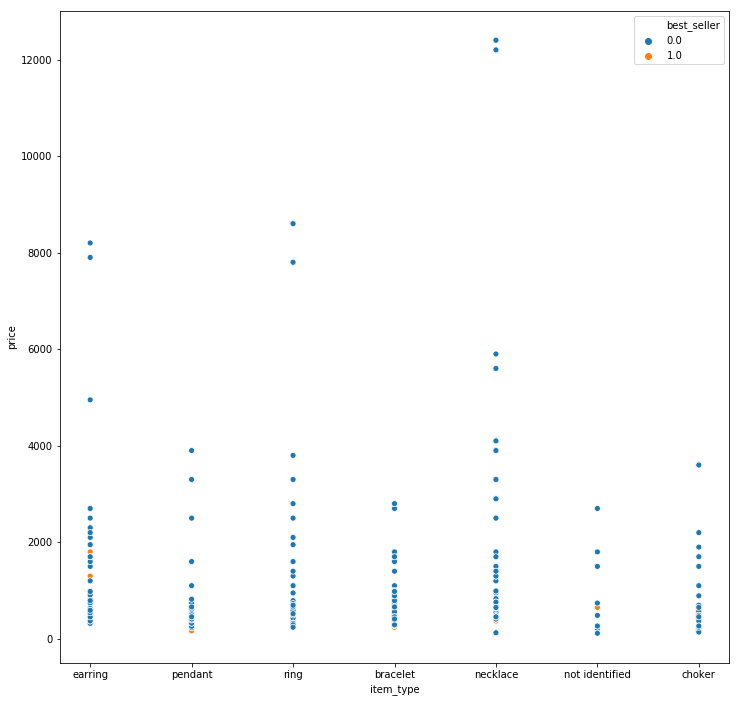

In [86]:
plt.figure(figsize=(12,12))
sns.scatterplot(x="item_type",y="price",hue='best_seller',data=new_df);

from the plot above, we can see that necklaces have the highest prices, followed by rings. Bracelets have the lowest prices. Best sellers tend to be lower-price

### Price vs item features (material, crystal, gemstones)

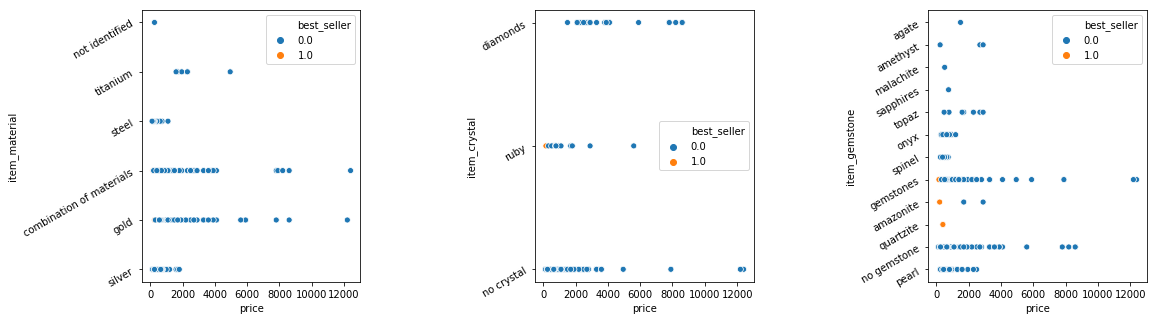

In [87]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x="price",y="item_material",hue='best_seller',data=new_df)
plt.yticks(rotation=30)
plt.subplot(1,3,2)
sns.scatterplot(x="price",y="item_crystal",hue='best_seller',data=new_df)
plt.yticks(rotation=30)
plt.subplot(1,3,3)
sns.scatterplot(x="price",y="item_gemstone",hue='best_seller',data=new_df)
plt.yticks(rotation=30)
plt.subplots_adjust(wspace=0.8);

Silver and steel items are the materials with the lowest prices, followed by titanium, although a few titanium items are about mid-range priced.
Items with Quartize and Amazonite gemstones tend to be best sellers.

### Price vs Best Seller

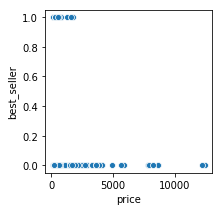

In [88]:
plt.figure(figsize=(3,3))
sns.scatterplot(x="price",y="best_seller",data=new_df);

We can clearly see from the plot above that best sellers are items with lower prices (below 2000)

-------------------------------------------------------------------------------------------------------------------------

We will remove the item type column before clustering, then we will check our clusters to see if they correspond to the item types

In [89]:
categorical_df = new_df.copy()

In [90]:
new_df.drop('item_type',axis=1,inplace=True)

C:\Users\noura\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [91]:
new_df.head()

,best_seller,price,item_material,item_gemstone,item_crystal
0,1.0,485,silver,pearl,no crystal
1,1.0,620,silver,pearl,no crystal
2,1.0,370,silver,no gemstone,no crystal
3,1.0,370,silver,no gemstone,no crystal
4,1.0,1300,gold,pearl,no crystal


In [92]:
new_df = pd.get_dummies(new_df)

## Scaling the data

In [93]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
Xs = ss.fit_transform(new_df)

# 3- Build a Clustering Model

Since we have a small dataset, we will create a dendogram to see the hierarchy of the dataset and choose an appropriate number of clusters based on the dendogram. 

## Create a Dendogram

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

In [95]:
linked = linkage(new_df, 'ward')

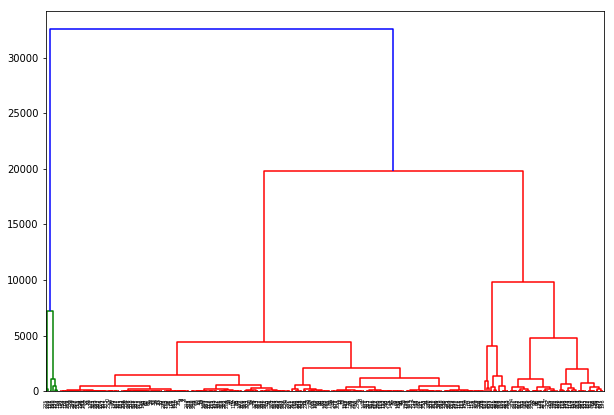

In [96]:
plt.figure(figsize=(10, 7))  
dendrogram(linked)
plt.show() 

## build a Hierarchical Clustering Model

According to the dendogram, we could go with 5 or 8 clusters. Considering the number of item types (we have 6 item types), I chose to go with 5 clusters. This is an initial choice, we could also change the number of clusters after testing 5 clusters.

In [97]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
ward = AgglomerativeClustering(n_clusters=5,linkage='ward')
ward_pred = ward.fit_predict(new_df)

In [99]:
new_df['cluster'] = ward_pred

In [100]:
new_df.cluster.value_counts()

2    257
0     57
1     15
3      6
4      2
Name: cluster, dtype: int64

# 4- Evaluating and Interpreting the Results

## Clustering Evaluation Metrics

According to the literature, silhouette is a more robust evaluation metric than inertia. The Silhoutte takes a range of values from -1 to 1, with 1 being the best case. Our model scored approximatly 0.74, therefore it seems that we have a good model.

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
labels = ward.labels_

In [103]:
silhouette_score(new_df, labels, metric='euclidean')

0.7374161038969308

## Visualizing the Results of Clustering

Our dataset is small enough that we can visually inspect and evaluate our clusters. 

### Clusters vs Price

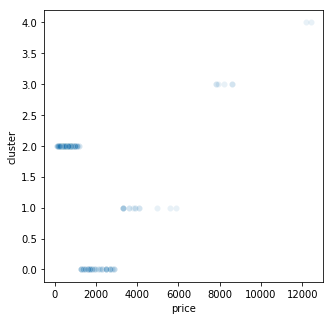

In [104]:
plt.figure(figsize=(5,5))
sns.scatterplot(new_df.price, new_df.cluster, alpha=0.1);

According to the plot above, the five clusters seem to reflect price ranges from low to high in the following order from lowest to highest prices:

cluster 2 - cluster 0 - cluster 1 - cluster 3 - cluster 4

There is almost no overlap between the five clusters in terms of price.
Cluster 2 has the darkest/most intense color because it is the largest cluster. Cluster 4 has the lightest color because it is the smallest cluster (only 2 observations)

### Clusters vs Item Types

We would like to check our clusters against our original item types (bracelet, earring, pendant ..), therefore we will use our previously created categorical_df dataframe and add to it a column with the cluster number.

In [48]:
categorical_df['cluster'] = new_df.cluster

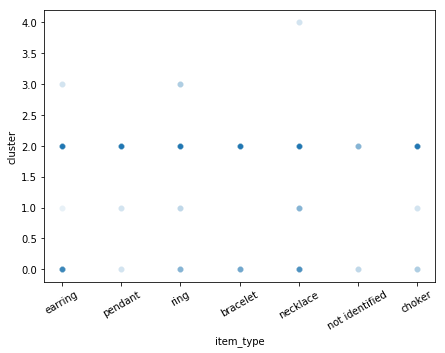

In [56]:
plt.figure(figsize=(7,5))
sns.scatterplot(categorical_df.item_type, categorical_df.cluster, alpha=0.1)
plt.xticks(rotation=30);

most of the items types belong to all clusters. 
We Can see that Necklaces are the only items that belong to cluster 4. They are also the only item type that includes items that are highly priced. 
Bracelets belong only to clusters 0 and 2. They are also the lowest priced items according to our EDA. Again, the intensity of the color reflects the number of observations in a cluster. Cluster 2 is the largest cluster, therefore it has the darkest color on the plot. This is because most items of the brand are within that price range (below 1000) because Tous is a relatively inexpensive brand.

Consistent with the previous plot, the clusters indicate the price range of the items. However, looking at the item type, we do not see any pattern other than the price.

### Clusters vs Item Materials 

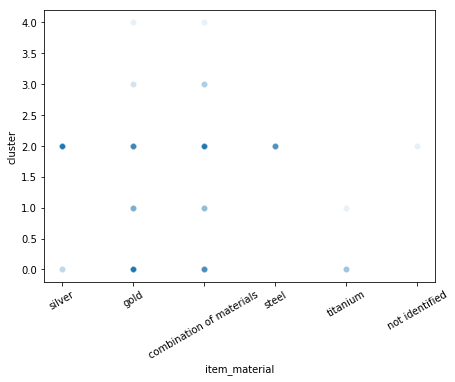

In [55]:
plt.figure(figsize=(7,5))
sns.scatterplot(categorical_df.item_material, categorical_df.cluster, alpha=0.1)
plt.xticks(rotation=30);

most of the material types belong to all clusters. The only materials that belong to one or two clusters are silver steel which belong to the clusters 0 and 2. Silver and steel are also the lowest priced items. Titanium belongs to clusters 0 and 1, recall that titanium's price range was low to medium price range.

This further contributes to our observation that the clusters are formed around the price.

### Clusters vs Best Sellers

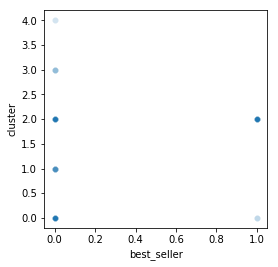

In [58]:
plt.figure(figsize=(4,4))
sns.scatterplot(categorical_df.best_seller, categorical_df.cluster, alpha=0.1);

According to our EDA, best sellers are lower priced items. As we can see in the plot above, best sellers are found in clusters 0 and 2, which are the clusters we identified indicating lower prices. Again this is consistent with our finding that the clusters basically indicate the prices of the items.

## Detecting Outliers

Our clustering process has actually detected outliers within the dataset. Cluster number 4 represents the two most expensive items in our dataset. Our dataset has a median of 620 SR. 75% of the dataset is between 115 and 1100 SR. The two observations in cluster 4 are both above 12000 SR.

In [52]:
categorical_df.price[categorical_df.cluster==4]

225    12400
226    12200
Name: price, dtype: int32

In [53]:
categorical_df.price.median()

620.0

In [54]:
categorical_df.price.describe()

count      337.000000
mean      1137.264095
std       1581.781216
min        115.000000
25%        410.000000
50%        620.000000
75%       1100.000000
max      12400.000000
Name: price, dtype: float64

# 5- Conclusions

In this case study, we used hierarchical clustering to cluster the Tous accessories dataset and find the underlying pattern of the data. We obtained a Silhouette score of approximately 0.74, which indicates that our model is performing well. We wanted to find out whether clustering the dataset would cluster them based on the item type. Therefore, we removed the columns corresponding to the item type before applying the clustering model, then we checked our clusters against the initial item types. The resulting clusters did not match the item types. Rather, the clusters demonstrated the different price ranges of the items. Moreover, one of the clusters detected outliers among the price feature.

### Future Work:
Further research could be done exploring different clustring models and different number of clusters. Also, we could try to remove the price since it is a strong feature, and check whether our model clusters the data differently making more use of the other features.